In [1]:
import astropy
from astropy.io import ascii
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt


In [2]:
sp1 = ascii.read("../../../reduccion/NGC1313/cal/slit1_ascii.txt")
print(sp1)

      col1           col2   
---------------- -----------
4024.00463867189   0.2809365
4025.50053572656   0.1263353
4026.99643278123   0.6645973
 4028.4923298359   0.2400979
4029.98822689057   0.4354501
4031.48412394525 -0.03192461
4032.98002099992   0.2785238
4034.47591805459   0.2410768
4035.97181510926   0.3245422
4037.46771216393   0.3363686
             ...         ...
7349.38379120828  0.07615397
7350.87968826295  0.07790677
7352.37558531762  0.07631195
7353.87148237229  0.07529981
7355.36737942697  0.07321899
7356.86327648164  0.07274434
7358.35917353631  0.06967138
7359.85507059098  0.07259004
7361.35096764566  0.07287291
7362.84686470033  0.07423379
  7364.342761755  0.06625135
Length = 2234 rows


In [3]:
# renombrar las columnas
sp1['col1'].name = 'wavelength'
sp1['col2'].name = "flux"
sp1



wavelength,flux
float64,float64
4024.00463867189,0.2809365
4025.50053572656,0.1263353
4026.99643278123,0.6645973
4028.4923298359,0.2400979
4029.98822689057,0.4354501
4031.48412394525,-0.03192461
4032.98002099992,0.2785238
4034.47591805459,0.2410768
4035.97181510926,0.3245422


In [4]:
wave = sp1["wavelength"]
flux = sp1["flux"]
wave.data

array([4024.00463867, 4025.50053573, 4026.99643278, ..., 7361.35096765,
       7362.8468647 , 7364.34276175])

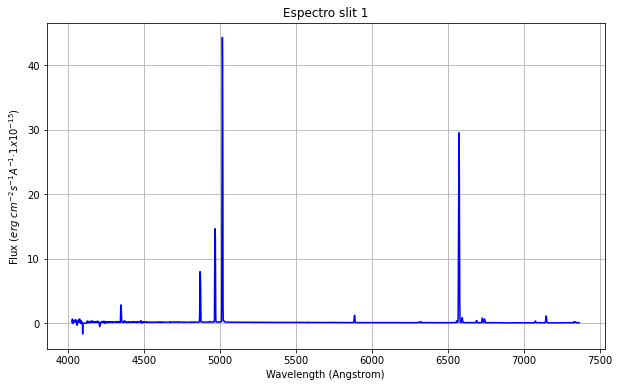

In [5]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1')
plt.grid(True)
plt.show()

In [6]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave_ccm89 = extinction.ccm89(wave, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con ccm89: {wave_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave_f99 = extinction.fitzpatrick99(wave, 0.299, 3.1)
print(f' extinción en magnitudes para slit 1 con f99: {wave_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave_fm07 = extinction.fm07(wave, 0.299)
print(f' extinción en magnitudes para slit 1 con fm07: {wave_fm07}')

 extinción en magnitudes para slit 1 con ccm89: [0.43563222 0.43548925 0.43534611 ... 0.2074851  0.20741561 0.20734611]
 extinción en magnitudes para slit 1 con f99: [0.42348602 0.4233575  0.42322902 ... 0.18983148 0.18976888 0.18970631]
 extinción en magnitudes para slit 1 con fm07: [0.42440037 0.42426886 0.42413734 ... 0.18972868 0.18966116 0.18959367]


In [7]:
from extinction import ccm89, fm07, fitzpatrick99, remove

#print(f'valor de flujo original: {flux}')

# "deredden" flux by A_V = 0.299 with CCM89
flux_ccm89 = remove(ccm89(wave, 0.299, 3.1), flux)
print(f'valor de flujo deredden para slit 1 con ccm89: {flux_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux_f99 = remove(fitzpatrick99(wave, 0.299, 3.1), flux)
print(f'valor de flujo deredden para slit 1 con f99: {flux_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux_fm07 = remove(fm07(wave, 0.299), flux)
print(f'valor de flujo deredden para slit 1 con fm07: {flux_fm07}')





valor de flujo deredden para slit 1 con ccm89:         flux        
--------------------
   0.419624711988652
  0.1886776316615044
  0.9924234429496577
 0.35848375148523387
  0.6500729748121912
-0.04765317604363402
 0.41569138820298773
 0.35975474426794696
  0.4842444092702112
   0.501823675208466
                 ...
  0.0922378200745257
 0.09435477238509583
  0.0924173295843151
 0.09118574223207311
 0.08866025688198319
 0.08807986797353064
 0.08435368445912148
  0.0878817867050669
 0.08821859851278625
 0.08986030257392069
 0.08019239370570143
Length = 2234 rows
valor de flujo deredden para slit 1 con f99:          flux        
---------------------
  0.41495650231049247
  0.18658112896227227
   0.9814093245671431
  0.35451008037995796
   0.6428760615403867
-0.047126274200829335
   0.4111009452768482
  0.35578714521030835
   0.4789108696154274
    0.496303870660187
                  ...
  0.09074565715077888
  0.09282893614267662
  0.09092338785371142
   0.0897122674164939
  0.0872281

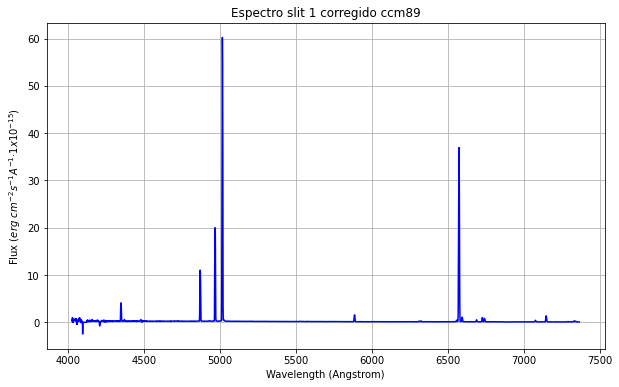

In [8]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido ccm89')
plt.grid(True)
plt.show()

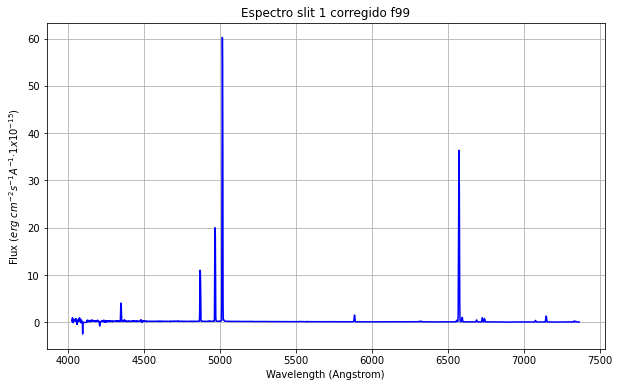

In [9]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido f99')
plt.grid(True)
plt.show()

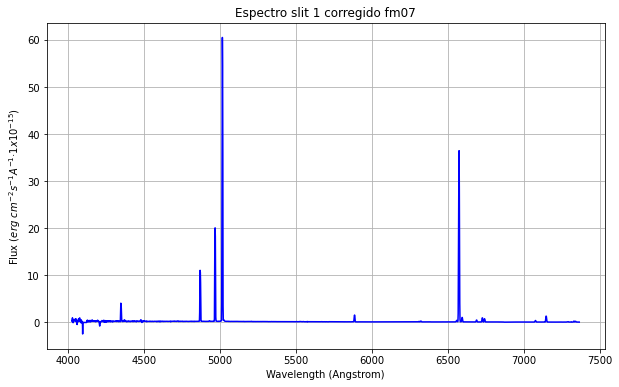

In [10]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave, flux_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 1 corregido fm07')
plt.grid(True)
plt.show()

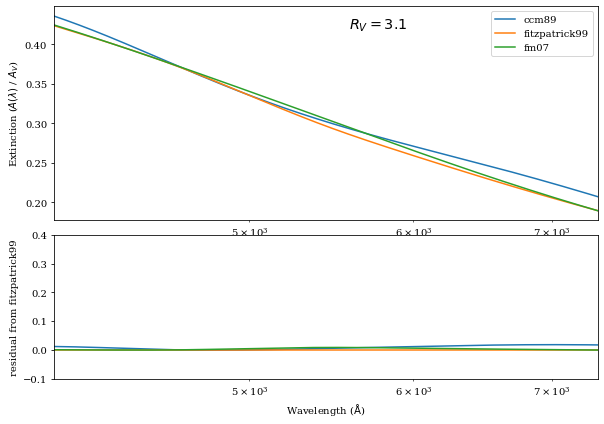

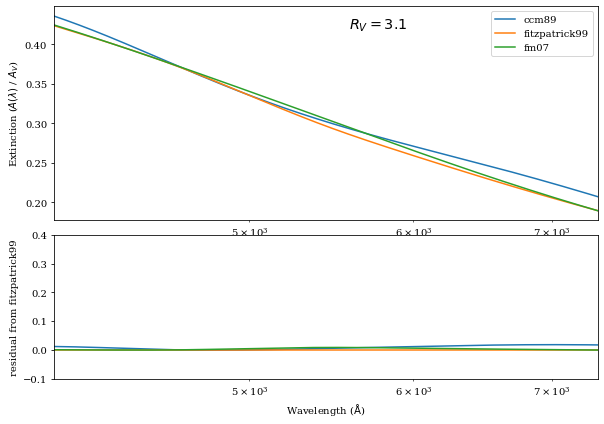

In [11]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda = {'ccm89': extinction.ccm89(wave, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave, 0.299, 3.1),
            'fm07': extinction.fm07(wave, 0.299)}
extinction_figure(wave, a_lambda, 'fitzpatrick99')

In [12]:
resta_f99 = flux_f99 - flux
resta_f99

0.1340200023104925
0.06024582896227226
0.3168120245671432
0.11441218037995796
0.20742596154038667
-0.015201664200829336
0.13257714527684822
0.11471034521030835
0.1543686696154274
0.15993527066018698
0.20371119398649118


In [13]:
resta_ccm89 = flux_ccm89 - flux
resta_ccm89

0.138688211988652
0.06234233166150438
0.32782614294965773
0.11838585148523387
0.21462287481219117
-0.01572856604363402
0.13716758820298774
0.11867794426794695
0.15970220927021117
0.16545507520846603
0.2107339783083786


In [14]:
sp1

wavelength,flux
float64,float64
4024.00463867189,0.2809365
4025.50053572656,0.1263353
4026.99643278123,0.6645973
4028.4923298359,0.2400979
4029.98822689057,0.4354501
4031.48412394525,-0.03192461
4032.98002099992,0.2785238
4034.47591805459,0.2410768
4035.97181510926,0.3245422


In [15]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data = np.column_stack((wave, flux_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file = '../../../reduccion/NGC1313/cal/slit1_corregidof99.txt'

np.savetxt(output_file, data, fmt=data_format)

print(f"Los datos han sido guardados en {output_file} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit1_corregidof99.txt sin notación científica


In [16]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data = np.column_stack((wave, flux_ccm89))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file = '../../../reduccion/NGC1313/cal/slit1_corregidoccm89.txt'

np.savetxt(output_file, data, fmt=data_format)

print(f"Los datos han sido guardados en {output_file} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit1_corregidoccm89.txt sin notación científica


In [17]:
# new test for ascii data + ascii header = 1ascii
#import numpy as np

# Leer el archivo ASCII de datos (sin header)
#data_file = 'slit1_corregidof99.txt'
#data = np.loadtxt(data_file)

# Leer el header desde un archivo ASCII
#header_file = '../../../reduccion/NGC1313/cal/slit1_ascii_header.txt'
#with open(header_file, 'r') as file:
#    header_lines = file.readlines()

# Escribir el nuevo archivo ASCII con el header incluido
#output_file = 'slit1_corregidof99_header.txt'

#with open(output_file, 'w') as file:
    # Escribir el header
#    file.writelines(header_lines)
    # Escribir los datos
#    np.savetxt(file, data, fmt='%.6e')

#print(f"El archivo ASCII con el nuevo header ha sido guardado en {output_file}")


SLIT 3

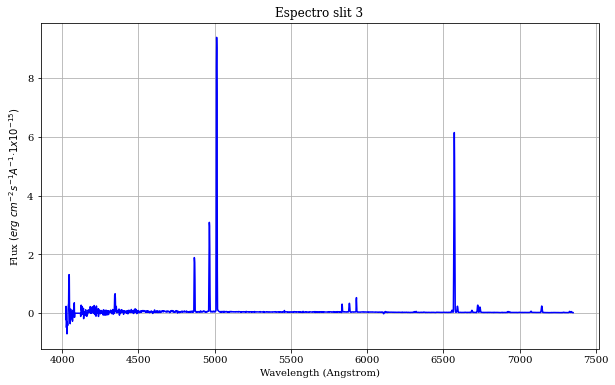

In [18]:
sp3 = ascii.read("../../../reduccion/NGC1313/cal/slit3_ascii.txt")
#print(sp1)

# renombrar las columnas
sp3['col1'].name = 'wavelength'
sp3['col2'].name = "flux"
#sp3

wave3 = sp3["wavelength"]
flux3 = sp3["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3')
plt.grid(True)
plt.show()


In [19]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave3_ccm89 = extinction.ccm89(wave3, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave3_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave3_f99 = extinction.fitzpatrick99(wave3, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave3_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave3_fm07 = extinction.fm07(wave3, 0.299)
print(f' extinción en magnitudes con fm07: {wave3_fm07}')



 extinción en magnitudes con ccm89: [0.4355478  0.43540474 0.4352615  ... 0.20808301 0.20801349 0.20794397]
 extinción en magnitudes con f99: [0.42341011 0.42328162 0.42315317 ... 0.19037104 0.19030821 0.19024541]
 extinción en magnitudes con fm07: [0.4243227  0.42419119 0.42405968 ... 0.19031071 0.19024293 0.19017518]


In [20]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux3}')

# "deredden" flux by A_V = 0.299 with CCM89
flux3_ccm89 = remove(ccm89(wave3, 0.299, 3.1), flux3)
print(f'valor de flujo deredden para slit 3 con ccm89: {flux3_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux3_f99 = remove(fitzpatrick99(wave3, 0.299, 3.1), flux3)
print(f'valor de flujo deredden para slit 3 con f99: {flux3_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux3_fm07 = remove(fm07(wave3, 0.299), flux3)
print(f'valor de flujo deredden para slit 3 con fm07: {flux3_fm07}')





valor de flujo original:    flux   
----------
-0.2112266
 0.2330359
-0.4803878
-0.4864286
-0.3252909
-0.7021431
-0.3023716
  -0.35929
-0.4184081
-0.3118795
       ...
0.04386516
0.05465405
0.05775708
0.05132952
0.03664066
0.02717597
0.01952718
 0.0226147
0.02420557
0.02303245
 0.0214294
Length = 2225 rows
valor de flujo deredden para slit 3 con ccm89:         flux        
--------------------
 -0.3154770183175853
  0.3480043920461307
 -0.7172929616148622
 -0.7262168775101272
 -0.4855810357688834
 -1.0479919180223825
-0.45124845537828046
 -0.5361202616564194
 -0.6242513166784527
-0.46525220200516915
                 ...
 0.05315883171115371
   0.066229311831936
  0.0699850545144332
 0.06219270761377953
 0.04439230908882298
 0.03292317341409054
0.023655294171872124
0.027393772472082113
0.029318957119414485
0.027896231186269382
0.025953002068138567
Length = 2225 rows
valor de flujo deredden para slit 3 con f99:         flux        
--------------------
 -0.3119698692135987
  0.3441402573

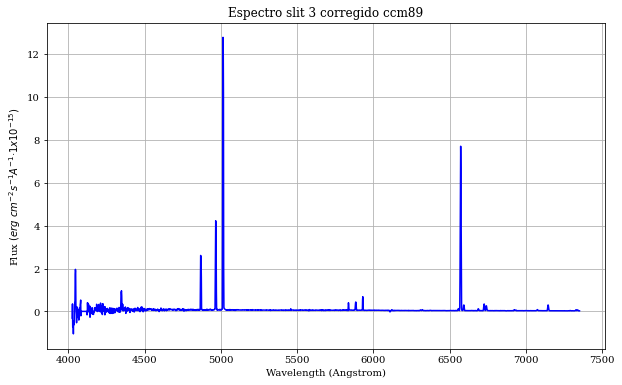

In [21]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido ccm89')
plt.grid(True)
plt.show()

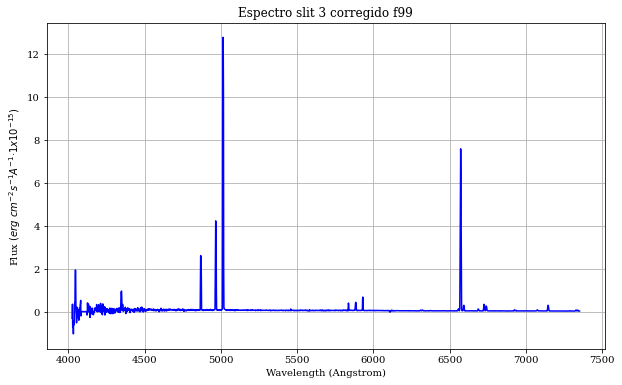

In [22]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido f99')
plt.grid(True)
plt.show()

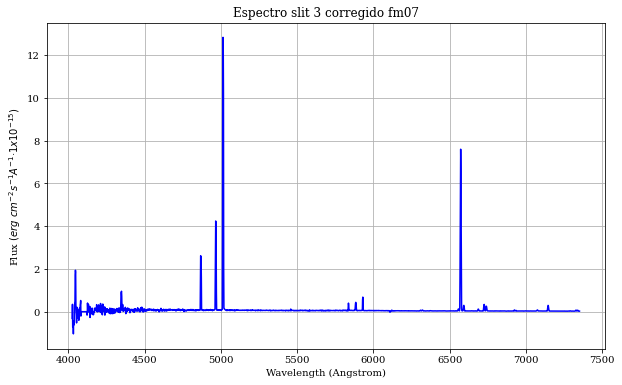

In [23]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave3, flux3_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 3 corregido fm07')
plt.grid(True)
plt.show()

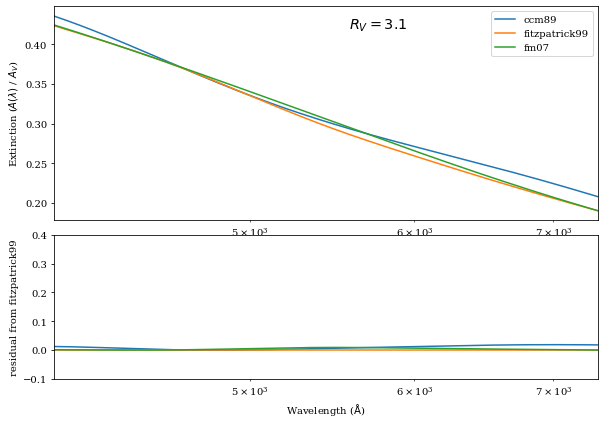

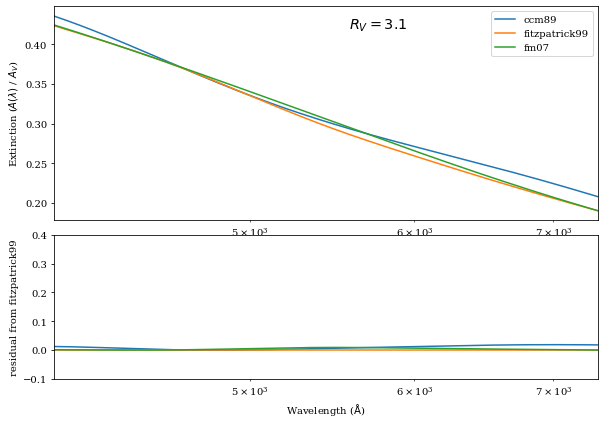

In [24]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda3 = {'ccm89': extinction.ccm89(wave3, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave3, 0.299, 3.1),
            'fm07': extinction.fm07(wave3, 0.299)}
extinction_figure(wave3, a_lambda3, 'fitzpatrick99')

In [25]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data3 = np.column_stack((wave3, flux3_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file3 = '../../../reduccion/NGC1313/cal/slit3_corregidof99.txt'

np.savetxt(output_file3, data3, fmt=data_format)

print(f"Los datos han sido guardados en {output_file3} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit3_corregidof99.txt sin notación científica


SLIT 5

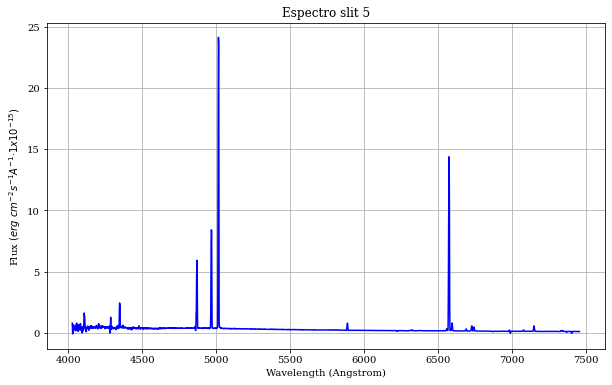

In [26]:
sp5 = ascii.read("../../../reduccion/NGC1313/cal/slit5_ascii.txt")
#print(sp1)

# renombrar las columnas
sp5['col1'].name = 'wavelength'
sp5['col2'].name = "flux"
#sp3

wave5 = sp5["wavelength"]
flux5 = sp5["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5')
plt.grid(True)
plt.show()

In [27]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave5_ccm89 = extinction.ccm89(wave5, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave5_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave5_f99 = extinction.fitzpatrick99(wave5, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave5_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave5_fm07 = extinction.fm07(wave5, 0.299)
print(f' extinción en magnitudes con fm07: {wave5_fm07}')



 extinción en magnitudes con ccm89: [0.43538543 0.43524222 0.43509885 ... 0.20327908 0.20320989 0.2031407 ]
 extinción en magnitudes con f99: [0.42326429 0.4231359  0.42300753 ... 0.18608519 0.18602426 0.18596335]
 extinción en magnitudes con fm07: [0.42417346 0.42404199 0.42391052 ... 0.18569145 0.18562584 0.18556026]


In [28]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux5}')

# "deredden" flux by A_V = 0.299 with CCM89
flux5_ccm89 = remove(ccm89(wave5, 0.299, 3.1), flux5)
print(f'valor de flujo deredden para slit 5 con ccm89: {flux5_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux5_f99 = remove(fitzpatrick99(wave5, 0.299, 3.1), flux5)
print(f'valor de flujo deredden para slit 5 con f99: {flux5_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux5_fm07 = remove(fm07(wave5, 0.299), flux5)
print(f'valor de flujo deredden para slit 5 con fm07: {flux5_fm07}')





valor de flujo original:     flux   
-----------
  0.7848763
   0.356537
-0.08566111
 0.04824561
 0.07302524
  0.5984893
  0.6569011
  0.6114562
  0.3125824
  0.4124228
        ...
  0.1082854
  0.1062986
  0.1080858
  0.1024473
  0.1025916
  0.1052685
  0.1066046
  0.1057712
  0.1005358
 0.09873971
  0.1032504
Length = 2294 rows
valor de flujo deredden para slit 5 con ccm89:         flux       
-------------------
 1.1720749554204362
 0.5323551936980792
-0.1278860685812478
0.07201781172614212
0.10899275332783859
 0.8931480694194048
 0.9801881254492706
 0.9122567950661413
 0.4662925894819191
  0.615146884863539
                ...
0.13064808101443948
  0.128242796565445
0.13039063013440322
0.12358067683318165
0.12374685413943795
0.12696765914098934
0.12857097556019104
 0.1275577188931503
0.12123621558404393
0.11906272096693321
0.12449388614329099
Length = 2294 rows
valor de flujo deredden para slit 5 con f99:         flux        
--------------------
   1.159062707911439
  0.5264522234

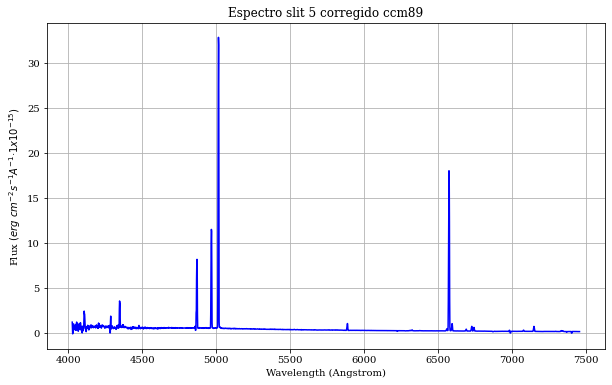

In [29]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5 corregido ccm89')
plt.grid(True)
plt.show()

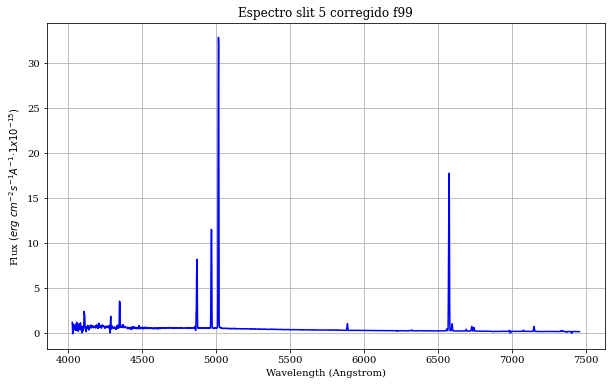

In [30]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5 corregido f99')
plt.grid(True)
plt.show()

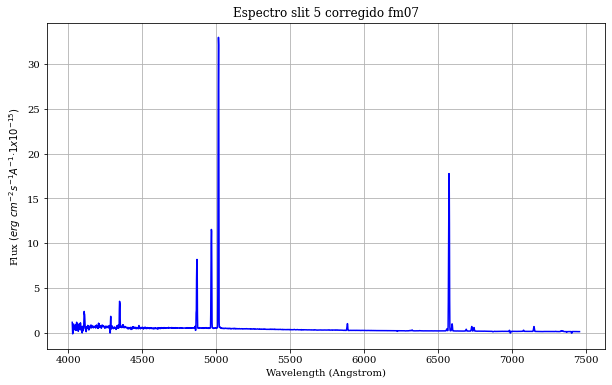

In [31]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave5, flux5_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 5 corregido fm07')
plt.grid(True)
plt.show()

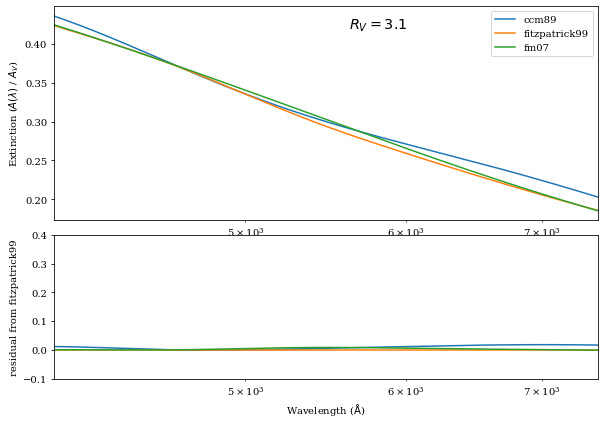

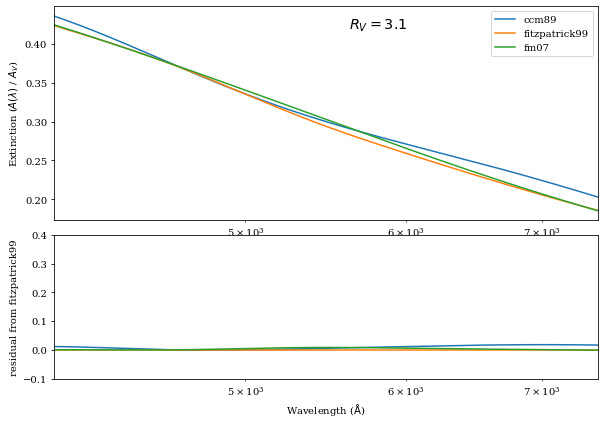

In [32]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda5 = {'ccm89': extinction.ccm89(wave5, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave5, 0.299, 3.1),
            'fm07': extinction.fm07(wave5, 0.299)}
extinction_figure(wave5, a_lambda5, 'fitzpatrick99')

In [33]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data5 = np.column_stack((wave5, flux5_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file5 = '../../../reduccion/NGC1313/cal/slit5_corregidof99.txt'

np.savetxt(output_file5, data5, fmt=data_format)

print(f"Los datos han sido guardados en {output_file5} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit5_corregidof99.txt sin notación científica


SLIT 7

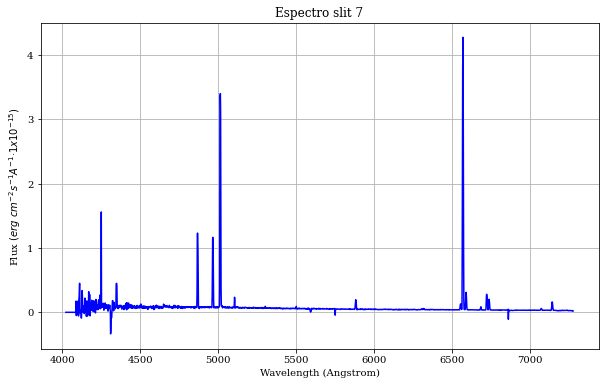

In [34]:
sp7 = ascii.read("../../../reduccion/NGC1313/cal/slit7_ascii.txt")
#print(sp7)

# renombrar las columnas
sp7['col1'].name = 'wavelength'
sp7['col2'].name = "flux"
#sp7

wave7 = sp7["wavelength"]
flux7 = sp7["flux"]
#wave7.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7, flux7, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7')
plt.grid(True)
plt.show()

In [35]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave7
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave7_ccm89 = extinction.ccm89(wave7, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave7_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave7_f99 = extinction.fitzpatrick99(wave7, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave7_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave7_fm07 = extinction.fm07(wave7, 0.299)
print(f' extinción en magnitudes con fm07: {wave7_fm07}')



 extinción en magnitudes con ccm89: [0.43584896 0.43570619 0.43556324 ... 0.21141671 0.21134704 0.21127738]
 extinción en magnitudes con f99: [0.42368121 0.42355258 0.42342399 ... 0.19341345 0.19334927 0.19328511]
 extinción en magnitudes con fm07: [0.42460002 0.42446847 0.4243369  ... 0.19359522 0.19352588 0.19345657]


In [36]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux7}')

# "deredden" flux by A_V = 0.299 with CCM89
flux7_ccm89 = remove(ccm89(wave7, 0.299, 3.1), flux7)
print(f'valor de flujo deredden para slit 7 con ccm89: {flux7_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux7_f99 = remove(fitzpatrick99(wave7, 0.299, 3.1), flux7)
print(f'valor de flujo deredden para slit 7 con f99: {flux7_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux7_fm07 = remove(fm07(wave7, 0.299), flux7)
print(f'valor de flujo deredden para slit 7 con fm07: {flux7_fm07}')





valor de flujo original:    flux   
----------
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       ...
0.02766128
0.02599074
0.02506806
0.02549209
0.02357678
0.02035569
0.02023196
0.02001385
0.02432255
0.02350372
0.02177298
Length = 2178 rows
valor de flujo deredden para slit 7 con ccm89:         flux        
--------------------
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 ...
 0.03362497077831613
0.031592239698640036
0.030468749160291013
 0.03098214430077985
0.028652508510372536
0.024736378521884032
0.024584443300395564
0.024317850983611024
 0.02955124546878564
0.028554556689923075
0.026450191732499743
Length = 2178 rows
valor de flujo deredden para slit 7 con f99:         flux        
--------------------
                 0.0
              

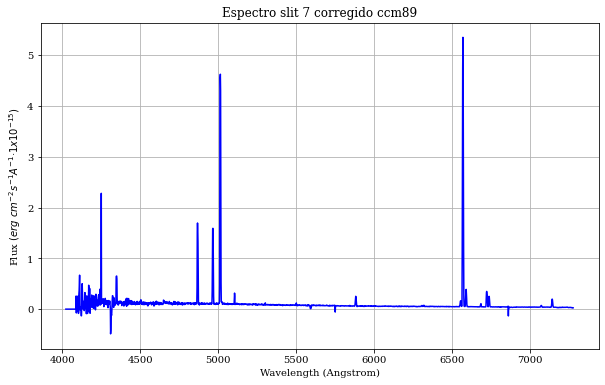

In [37]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7, flux7_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7 corregido ccm89')
plt.grid(True)
plt.show()

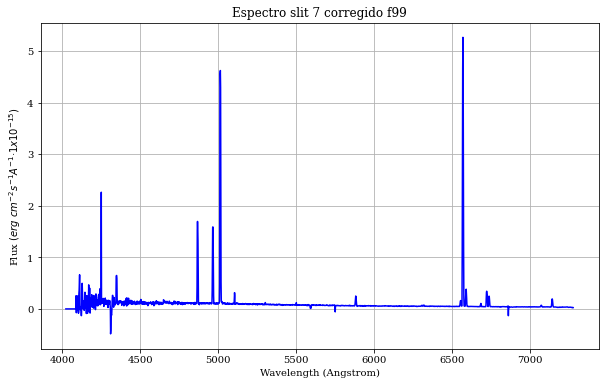

In [38]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7, flux7_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7 corregido f99')
plt.grid(True)
plt.show()

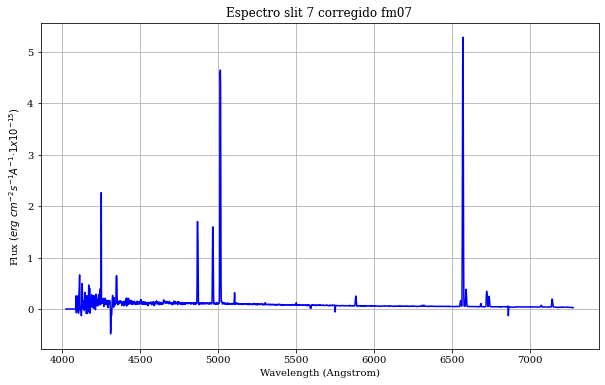

In [39]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave7, flux7_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 7 corregido fm07')
plt.grid(True)
plt.show()

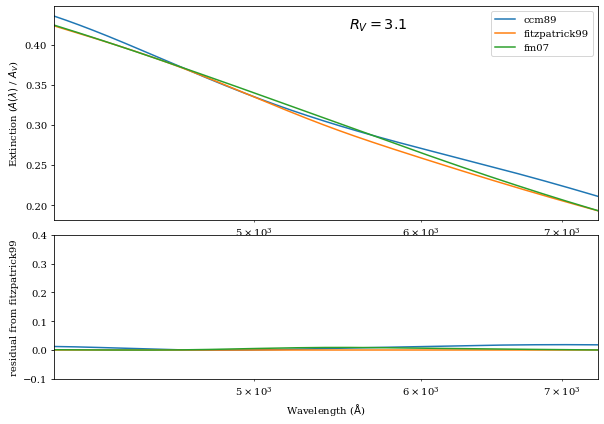

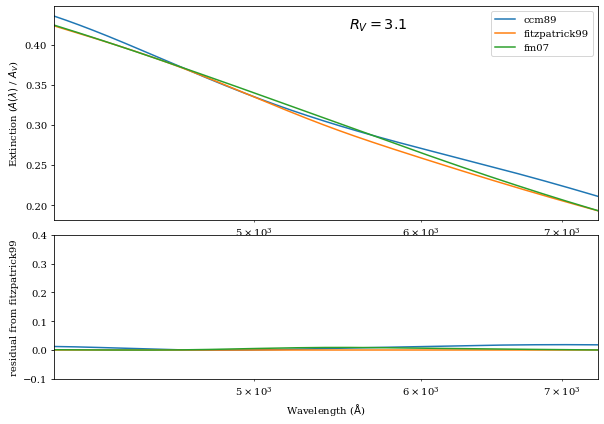

In [40]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda7 = {'ccm89': extinction.ccm89(wave7, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave7, 0.299, 3.1),
            'fm07': extinction.fm07(wave7, 0.299)}
extinction_figure(wave7, a_lambda7, 'fitzpatrick99')

In [41]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data7 = np.column_stack((wave7, flux7_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file7 = '../../../reduccion/NGC1313/cal/slit7_corregidof99.txt'

np.savetxt(output_file7, data7, fmt=data_format)

print(f"Los datos han sido guardados en {output_file7} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit7_corregidof99.txt sin notación científica


SLIT 9

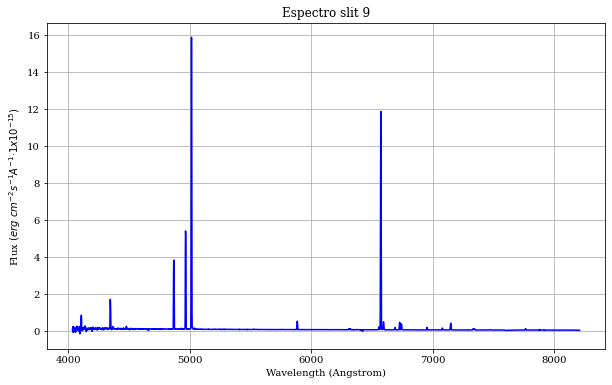

In [42]:
sp9 = ascii.read("../../../reduccion/NGC1313/cal/slit9_ascii.txt")
#print(sp9)

# renombrar las columnas
sp9['col1'].name = 'wavelength'
sp9['col2'].name = "flux"
#sp9

wave9 = sp9["wavelength"]
flux9 = sp9["flux"]
#wave9.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9, flux9, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9')
plt.grid(True)
plt.show()

In [43]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave9
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave9_ccm89 = extinction.ccm89(wave9, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave9_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave9_f99 = extinction.fitzpatrick99(wave9, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave9_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave9_fm07 = extinction.fm07(wave9, 0.299)
print(f' extinción en magnitudes con fm07: {wave9_fm07}')



 extinción en magnitudes con ccm89: [0.43456625 0.43442285 0.43427928 ... 0.17008655 0.17002625 0.16996599]
 extinción en magnitudes con f99: [0.42253232 0.4224048  0.42227731 ... 0.15854306 0.15849445 0.15844585]
 extinción en magnitudes con fm07: [0.42342342 0.42329261 0.42316178 ... 0.15623659 0.15618498 0.15613339]


In [44]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux9}')

# "deredden" flux by A_V = 0.299 with CCM89
flux9_ccm89 = remove(ccm89(wave9, 0.299, 3.1), flux9)
print(f'valor de flujo deredden para slit 9 con ccm89: {flux9_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux9_f99 = remove(fitzpatrick99(wave9, 0.299, 3.1), flux9)
print(f'valor de flujo deredden para slit 9 con f99: {flux9_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux9_fm07 = remove(fm07(wave9, 0.299), flux9)
print(f'valor de flujo deredden para slit 9 con fm07: {flux9_fm07}')





valor de flujo original:     flux    
------------
  0.05935967
  0.08791086
  0.04706356
   0.2067894
  0.09810194
  -0.1060736
   0.2128248
 0.006464097
 -0.06802726
-0.003397579
         ...
  0.02413266
  0.02323108
  0.02242519
  0.02480739
  0.02546783
  0.02458739
  0.02245159
  0.02027561
  0.01801529
  0.01813462
  0.01958222
Length = 2807 rows
valor de flujo deredden para slit 9 con ccm89:          flux        
---------------------
  0.08857639041395025
  0.13116309862827027
  0.07020959796457336
   0.3084483765172351
  0.14631008047319183
 -0.15817809216416567
   0.3173244700070337
 0.009636768649808305
 -0.10140251343214142
-0.005063810115146165
                  ...
 0.028237950705193714
 0.027181484486292772
 0.026237092331217075
  0.02902260954857179
 0.029793611551917856
 0.028762025991916962
 0.026262132869127375
 0.023715521497202796
 0.021070550277924847
 0.021208939907170595
 0.022900676965540382
Length = 2807 rows
valor de flujo deredden para slit 9 con f99:      

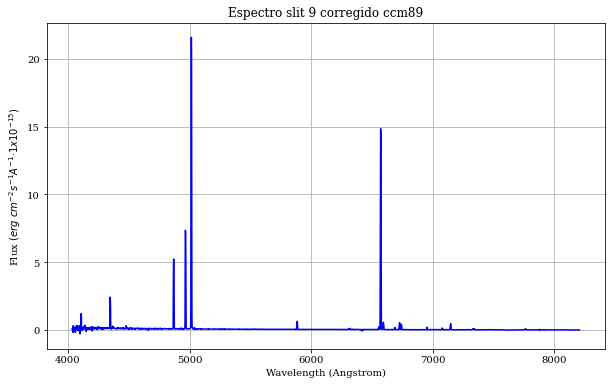

In [45]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9, flux9_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9 corregido ccm89')
plt.grid(True)
plt.show()

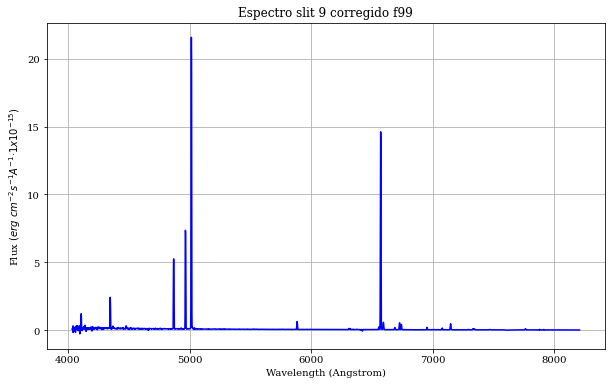

In [46]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9, flux9_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9 corregido f99')
plt.grid(True)
plt.show()

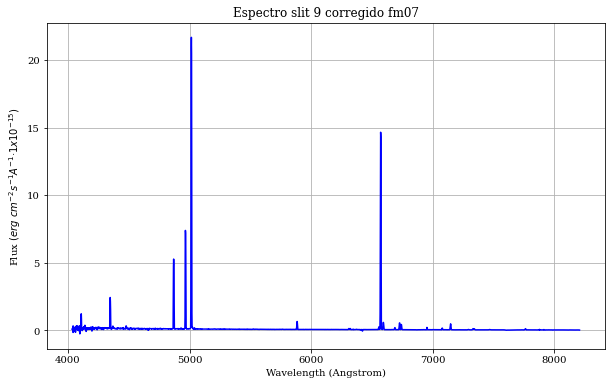

In [47]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave9, flux9_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 9 corregido fm07')
plt.grid(True)
plt.show()

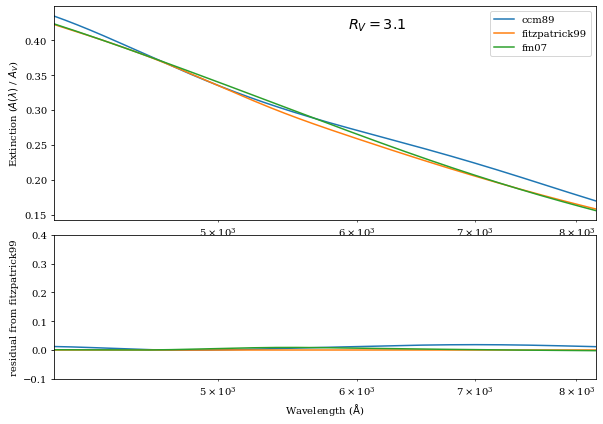

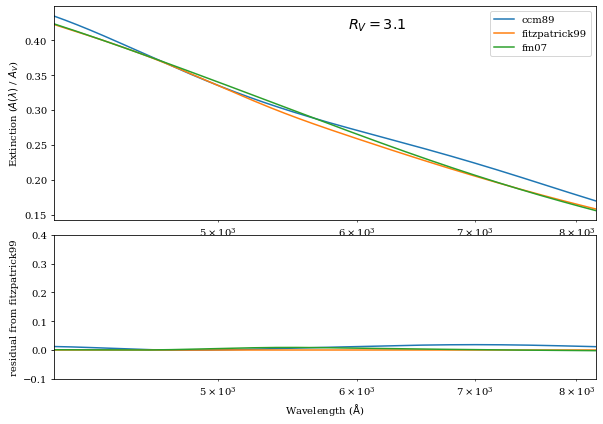

In [48]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda9 = {'ccm89': extinction.ccm89(wave9, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave9, 0.299, 3.1),
            'fm07': extinction.fm07(wave9, 0.299)}
extinction_figure(wave9, a_lambda9, 'fitzpatrick99')

In [49]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data9 = np.column_stack((wave9, flux9_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file9 = '../../../reduccion/NGC1313/cal/slit9_corregidof99.txt'

np.savetxt(output_file9, data9, fmt=data_format)

print(f"Los datos han sido guardados en {output_file9} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit9_corregidof99.txt sin notación científica


SLIT 11

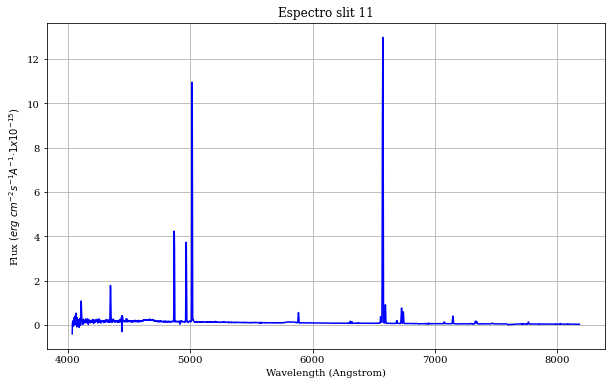

In [50]:
sp11 = ascii.read("../../../reduccion/NGC1313/cal/slit11_ascii.txt")
#print(sp11)

# renombrar las columnas
sp11['col1'].name = 'wavelength'
sp11['col2'].name = "flux"
#sp3

wave11 = sp11["wavelength"]
flux11 = sp11["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11, flux11, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11')
plt.grid(True)
plt.show()


In [51]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave11
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave11_ccm89 = extinction.ccm89(wave11, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave11_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave11_f99 = extinction.fitzpatrick99(wave11, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave11_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave11_fm07 = extinction.fm07(wave11, 0.299)
print(f' extinción en magnitudes con fm07: {wave11_fm07}')



 extinción en magnitudes con ccm89: [0.43453524 0.43439176 0.43424811 ... 0.17111645 0.17105565 0.17099488]
 extinción en magnitudes con f99: [0.42250472 0.42237717 0.42224965 ... 0.1593732  0.15932421 0.15927524]
 extinción en magnitudes con fm07: [0.42339511 0.42326426 0.4231334  ... 0.1571181  0.15706606 0.15701405]


In [52]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux11}')

# "deredden" flux by A_V = 0.299 with CCM89
flux11_ccm89 = remove(ccm89(wave11, 0.299, 3.1), flux11)
print(f'valor de flujo deredden para slit 11 con ccm89: {flux11_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux11_f99 = remove(fitzpatrick99(wave11, 0.299, 3.1), flux11)
print(f'valor de flujo deredden para slit 11 con f99: {flux11_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux11_fm07 = remove(fm07(wave11, 0.299), flux11)
print(f'valor de flujo deredden para slit 11 con fm07: {flux11_fm07}')





valor de flujo original:     flux   
-----------
 -0.3925779
 0.09593909
 0.08961169
 0.02341426
  0.1940053
0.007499787
-0.03833413
 -0.0471809
 -0.0215588
 0.02862523
        ...
 0.04325432
 0.04263519
 0.04232259
 0.04075797
 0.03931637
 0.03942221
 0.04148051
  0.0420827
 0.04024966
 0.03908245
 0.03922698
Length = 2789 rows
valor de flujo deredden para slit 11 con ccm89:          flux        
---------------------
  -0.5857872864258408
  0.14313712747921584
  0.13367922267830792
   0.0349238532284603
  0.28933283306501256
  0.01118343955963022
-0.057155016094030266
 -0.07033591949880555
 -0.03213495339145692
  0.04266228890713579
                  ...
  0.05066068127656333
 0.049932732283212884
  0.04956384246189537
  0.04772884111790392
  0.04603809899999587
 0.046159444313682976
  0.04856678322493558
  0.04926908607853309
  0.04712038127495313
 0.045751363487255205
 0.045917985503362214
Length = 2789 rows
valor de flujo deredden para slit 11 con f99:          flux        
-----

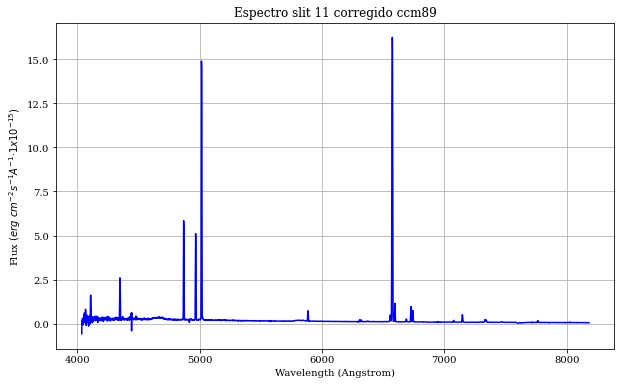

In [53]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11, flux11_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11 corregido ccm89')
plt.grid(True)
plt.show()

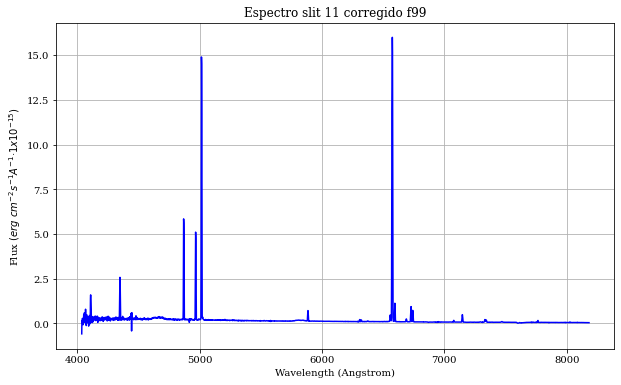

In [54]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11, flux11_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11 corregido f99')
plt.grid(True)
plt.show()

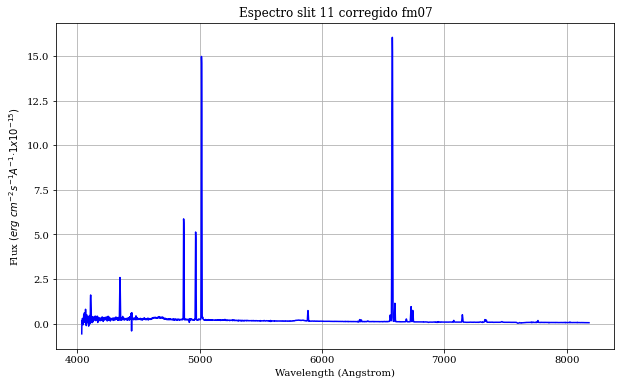

In [55]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave11, flux11_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 11 corregido fm07')
plt.grid(True)
plt.show()

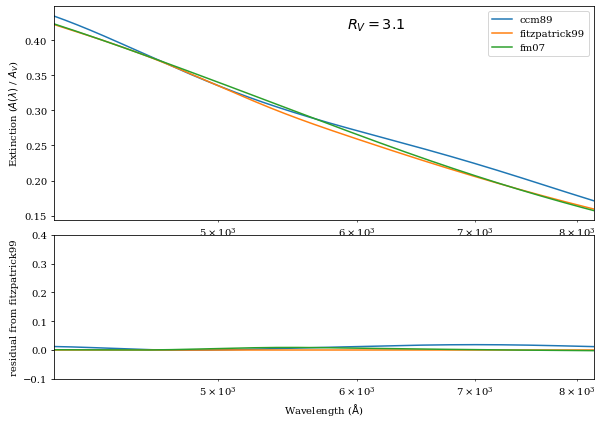

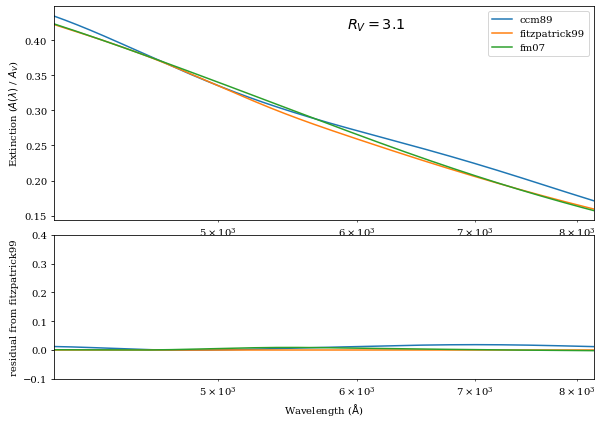

In [56]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda11 = {'ccm89': extinction.ccm89(wave11, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave11, 0.299, 3.1),
            'fm07': extinction.fm07(wave11, 0.299)}
extinction_figure(wave11, a_lambda11, 'fitzpatrick99')

In [57]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data11 = np.column_stack((wave11, flux11_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file11 = '../../../reduccion/NGC1313/cal/slit11_corregidof99.txt'

np.savetxt(output_file11, data11, fmt=data_format)

print(f"Los datos han sido guardados en {output_file11} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit11_corregidof99.txt sin notación científica


SLIT 13

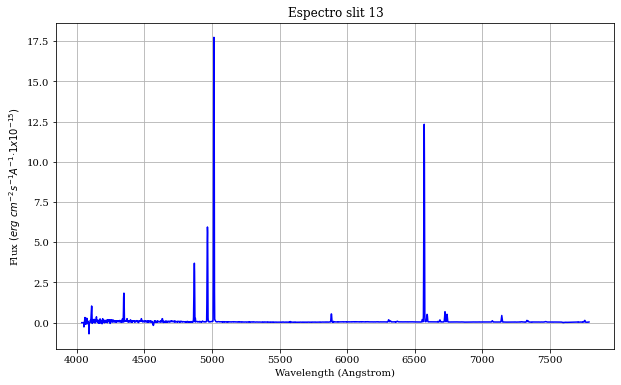

In [58]:
sp13 = ascii.read("../../../reduccion/NGC1313/cal/slit13_ascii.txt")
#print(sp1)

# renombrar las columnas
sp13['col1'].name = 'wavelength'
sp13['col2'].name = "flux"
#sp3

wave13 = sp13["wavelength"]
flux13 = sp13["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave13, flux13, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 13')
plt.grid(True)
plt.show()

In [59]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave13
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave13_ccm89 = extinction.ccm89(wave13, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave13_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave13_f99 = extinction.fitzpatrick99(wave13, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave13_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave13_fm07 = extinction.fm07(wave13, 0.299)
print(f' extinción en magnitudes con fm07: {wave13_fm07}')



 extinción en magnitudes con ccm89: [0.43452326 0.43437935 0.43423527 ... 0.18790825 0.18784155 0.18777487]
 extinción en magnitudes con f99: [0.42249406 0.42236615 0.42223826 ... 0.17300623 0.17295114 0.17289607]
 extinción en magnitudes con fm07: [0.42338418 0.42325295 0.42312171 ... 0.17165252 0.17159358 0.17153467]


In [60]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux13}')

# "deredden" flux by A_V = 0.299 with CCM89
flux13_ccm89 = remove(ccm89(wave13, 0.299, 3.1), flux13)
print(f'valor de flujo deredden para slit 13 con ccm89: {flux13_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux13_f99 = remove(fitzpatrick99(wave13, 0.299, 3.1), flux13)
print(f'valor de flujo deredden para slit 13 con f99: {flux13_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux13_fm07 = remove(fm07(wave13, 0.299), flux13)
print(f'valor de flujo deredden para slit 13 con fm07: {flux13_fm07}')





valor de flujo original:    flux   
----------
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       0.0
       ...
0.02757339
0.03007767
0.02943921
0.03076789
0.02882716
0.02842828
0.03619472
 0.0324742
0.03493275
0.03693881
0.04341558
Length = 2519 rows
valor de flujo deredden para slit 13 con ccm89:         flux        
--------------------
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 ...
 0.03279949188947951
 0.03577621688672821
 0.03501463910152766
 0.03659270389562201
0.034282456702585194
 0.03380601333390346
   0.043038972846942
0.038612546702600246
 0.04153326530787622
 0.04391567090842646
 0.05161257846978245
Length = 2519 rows
valor de flujo deredden para slit 13 con f99:         flux        
--------------------
                 0.0
            

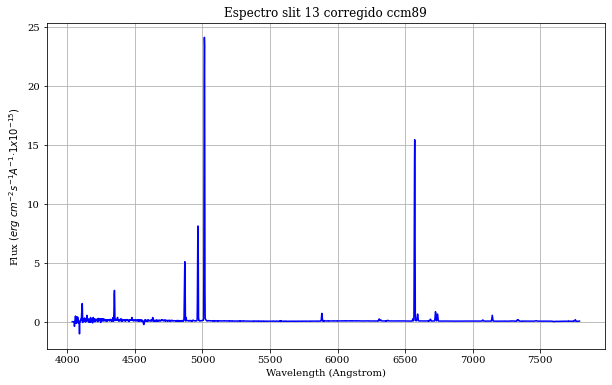

In [61]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave13, flux13_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 13 corregido ccm89')
plt.grid(True)
plt.show()

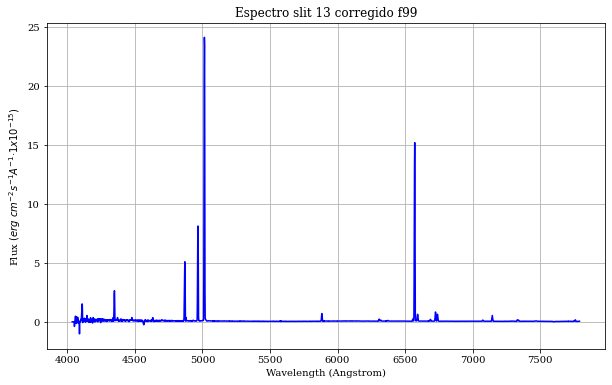

In [62]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave13, flux13_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 13 corregido f99')
plt.grid(True)
plt.show()

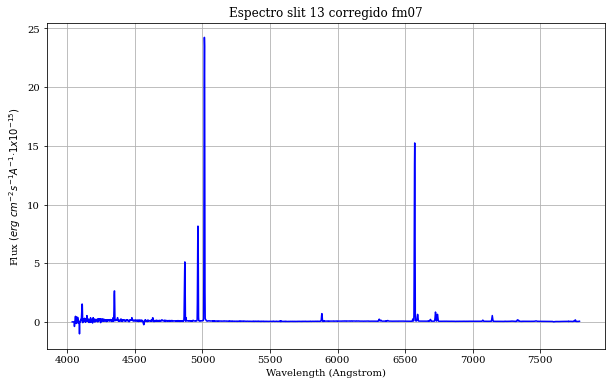

In [63]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave13, flux13_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 13 corregido fm07')
plt.grid(True)
plt.show()

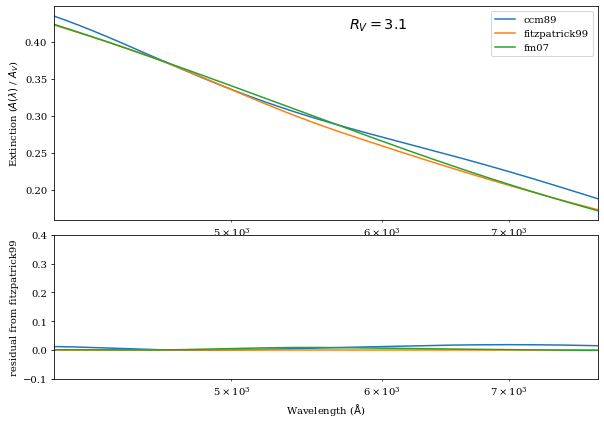

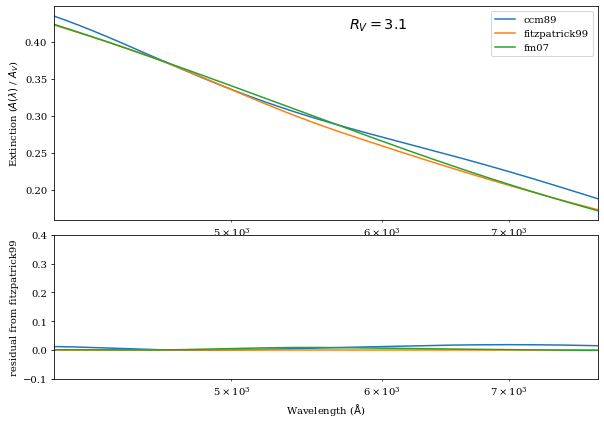

In [64]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda13 = {'ccm89': extinction.ccm89(wave13, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave13, 0.299, 3.1),
            'fm07': extinction.fm07(wave13, 0.299)}
extinction_figure(wave13, a_lambda13, 'fitzpatrick99')

In [65]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data13 = np.column_stack((wave13, flux13_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file13 = '../../../reduccion/NGC1313/cal/slit13_corregidof99.txt'

np.savetxt(output_file13, data13, fmt=data_format)

print(f"Los datos han sido guardados en {output_file13} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit13_corregidof99.txt sin notación científica


SLIT 15

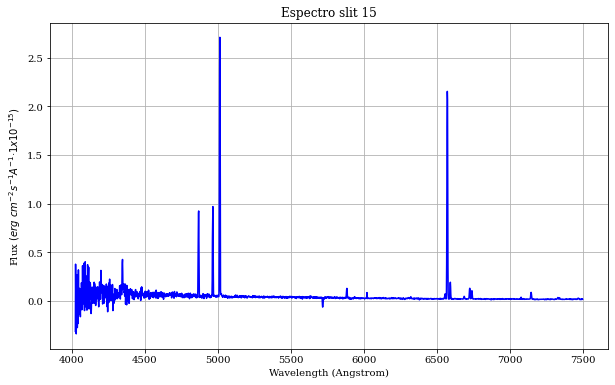

In [66]:
sp15 = ascii.read("../../../reduccion/NGC1313/cal/slit15_ascii.txt")
#print(sp15)

# renombrar las columnas
sp15['col1'].name = 'wavelength'
sp15['col2'].name = "flux"
#sp15

wave15 = sp15["wavelength"]
flux15 = sp15["flux"]
#wave7.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave15, flux15, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 15')
plt.grid(True)
plt.show()

In [67]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave7
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave15_ccm89 = extinction.ccm89(wave15, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave15_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave15_f99 = extinction.fitzpatrick99(wave15, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave15_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave15_fm07 = extinction.fm07(wave15, 0.299)
print(f' extinción en magnitudes con fm07: {wave15_fm07}')



 extinción en magnitudes con ccm89: [0.43548599 0.43534294 0.43519973 ... 0.20122855 0.20115956 0.20109057]
 extinción en magnitudes con f99: [0.42335457 0.42322618 0.42309783 ... 0.18428838 0.18422825 0.18416814]
 extinción en magnitudes con fm07: [0.42426586 0.42413444 0.42400301 ... 0.18375756 0.18369286 0.1836282 ]


In [68]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux15}')

# "deredden" flux by A_V = 0.299 with CCM89
flux15_ccm89 = remove(ccm89(wave15, 0.299, 3.1), flux15)
print(f'valor de flujo deredden para slit 15 con ccm89: {flux15_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux15_f99 = remove(fitzpatrick99(wave15, 0.299, 3.1), flux15)
print(f'valor de flujo deredden para slit 15 con f99: {flux15_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux15_fm07 = remove(fm07(wave15, 0.299), flux15)
print(f'valor de flujo deredden para slit 15 con fm07: {flux15_fm07}')





valor de flujo original:     flux   
-----------
 -0.3101657
  0.3790096
 0.04974806
  0.2081182
 -0.3365877
 -0.1072617
-0.01006465
  0.2715985
 0.04591975
 -0.2723906
        ...
 0.01673016
 0.01676257
 0.01797974
 0.01758815
 0.02188395
 0.01696206
 0.01560815
  0.0201335
 0.02084091
 0.01749134
 0.01895424
Length = 2325 rows
valor de flujo deredden para slit 15 con ccm89:          flux        
---------------------
  -0.4632209189020536
   0.5659621504096161
  0.07427728837827781
   0.3106938070176589
  -0.5024158736938162
 -0.16008560932700133
-0.015019266808904282
   0.4052469848955002
  0.06850688834183781
 -0.40632082062765684
                  ...
 0.020147092448413315
 0.020184838174918122
 0.021649130577812453
  0.02117627661567847
 0.026346779983358028
 0.020419862768614537
    0.018788757010175
  0.02423473622530607
  0.02508465297669992
  0.02105168702646731
  0.02281090968017689
Length = 2325 rows
valor de flujo deredden para slit 15 con f99:         flux        
------

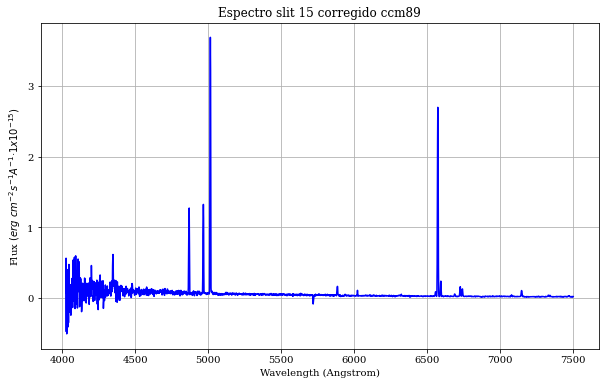

In [69]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave15, flux15_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 15 corregido ccm89')
plt.grid(True)
plt.show()

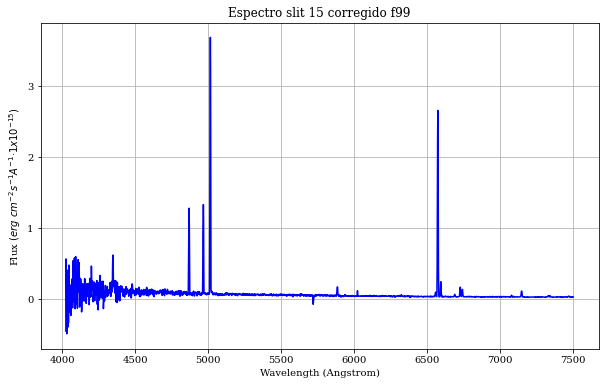

In [70]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave15, flux15_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 15 corregido f99')
plt.grid(True)
plt.show()

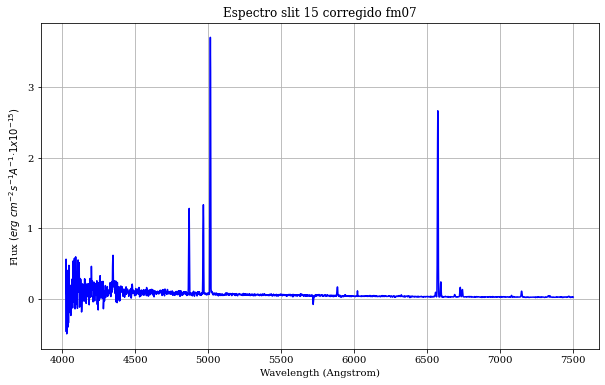

In [71]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave15, flux15_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 15 corregido fm07')
plt.grid(True)
plt.show()

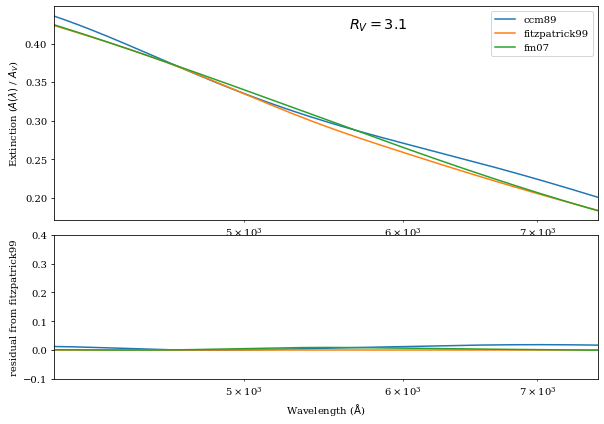

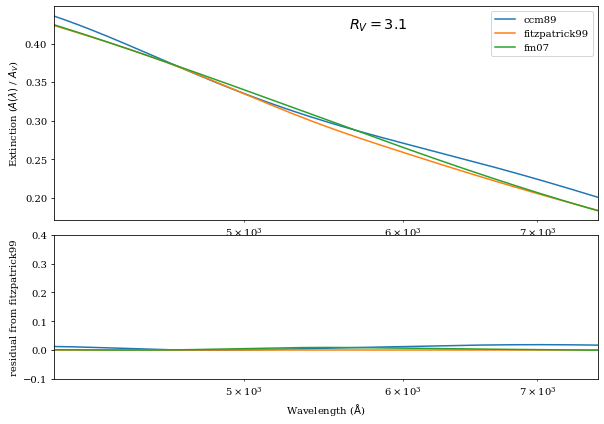

In [72]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda15 = {'ccm89': extinction.ccm89(wave15, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave15, 0.299, 3.1),
            'fm07': extinction.fm07(wave15, 0.299)}
extinction_figure(wave15, a_lambda15, 'fitzpatrick99')

In [73]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data15 = np.column_stack((wave15, flux15_f99))

# Especifica el formato de los datos (punto flotante con 6 decimales)
data_format = '%.6f'

# Escribir el array en un archivo ASCII sin notación científica
output_file15 = 'slit15_corregidof99.txt'

np.savetxt(output_file15, data15, fmt=data_format)

print(f"Los datos han sido guardados en {output_file15} sin notación científica")


Los datos han sido guardados en slit15_corregidof99.txt sin notación científica


SLIT 17

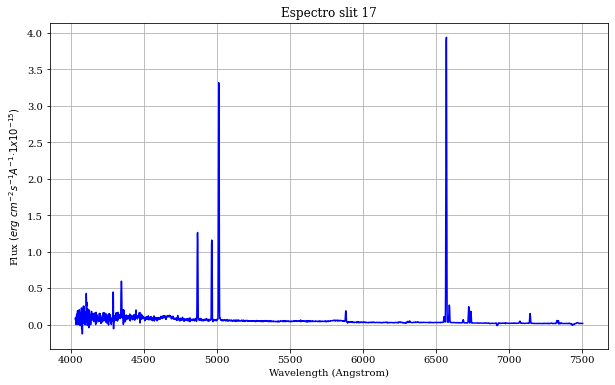

In [74]:
sp17 = ascii.read("../../../reduccion/NGC1313/cal/slit17_ascii.txt")
#print(sp17)

# renombrar las columnas
sp17['col1'].name = 'wavelength'
sp17['col2'].name = "flux"
#sp17

wave17 = sp17["wavelength"]
flux17 = sp17["flux"]
#wave9.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17, flux17, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17')
plt.grid(True)
plt.show()

In [75]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave9
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave17_ccm89 = extinction.ccm89(wave17, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave17_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave17_f99 = extinction.fitzpatrick99(wave17, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave17_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave17_fm07 = extinction.fm07(wave17, 0.299)
print(f' extinción en magnitudes con fm07: {wave17_fm07}')



 extinción en magnitudes con ccm89: [0.43487947 0.43473566 0.43459169 ... 0.20090369 0.20083472 0.20076575]
 extinción en magnitudes con f99: [0.42281148 0.4226832  0.42255496 ... 0.1840054  0.18394538 0.18388538]
 extinción en magnitudes con fm07: [0.42370963 0.42357814 0.42344664 ... 0.18345313 0.18338856 0.18332403]


In [76]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux17}')

# "deredden" flux by A_V = 0.299 with CCM89
flux17_ccm89 = remove(ccm89(wave17, 0.299, 3.1), flux17)
print(f'valor de flujo deredden para slit 17 con ccm89: {flux17_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux17_f99 = remove(fitzpatrick99(wave17, 0.299, 3.1), flux17)
print(f'valor de flujo deredden para slit 17 con f99: {flux17_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux17_fm07 = remove(fm07(wave17, 0.299), flux17)
print(f'valor de flujo deredden para slit 17 con fm07: {flux17_fm07}')





valor de flujo original:     flux   
-----------
 0.07924721
  0.1005051
 0.01363148
0.004365944
 0.01740096
 0.07241281
  0.1447486
 0.04105755
 0.09502642
 0.08379918
        ...
 0.01815403
 0.01789981
 0.02026356
 0.01931311
 0.01747789
 0.01592572
 0.01776705
 0.01985752
 0.01888852
 0.01887495
 0.01901458
Length = 2325 rows
valor de flujo deredden para slit 17 con ccm89:         flux        
--------------------
 0.11828665974287167
 0.14999692835592304
  0.0203413459782983
0.006514141361314762
 0.02595939104338952
 0.10801371384142712
 0.21588377739668646
0.061226683889500554
 0.14168832946619564
  0.1249313457055535
                 ...
0.021855227638347692
0.021547807940781694
  0.0243917417612547
0.023246184237046504
 0.02103588851262845
0.019166522999981162
 0.02138119557768288
0.023895387394399715
0.022727905017575312
0.022710133978843885
0.022876682113549755
Length = 2325 rows
valor de flujo deredden para slit 17 con f99:         flux        
--------------------
 0.116979

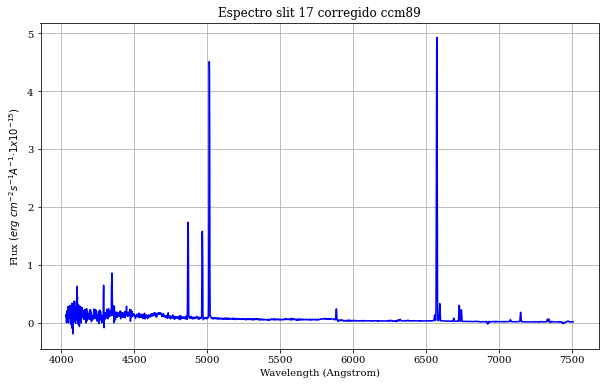

In [77]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17, flux17_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17 corregido ccm89')
plt.grid(True)
plt.show()

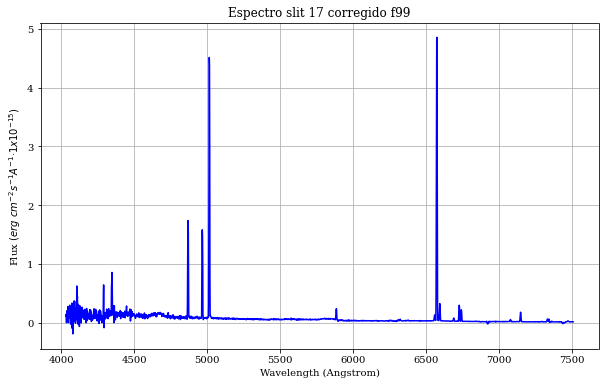

In [78]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17, flux17_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17 corregido f99')
plt.grid(True)
plt.show()

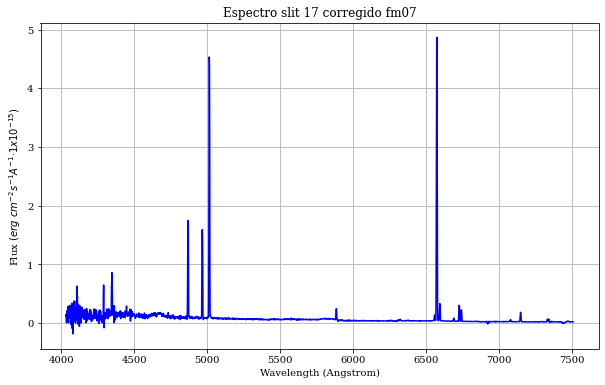

In [79]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave17, flux17_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 17 corregido fm07')
plt.grid(True)
plt.show()

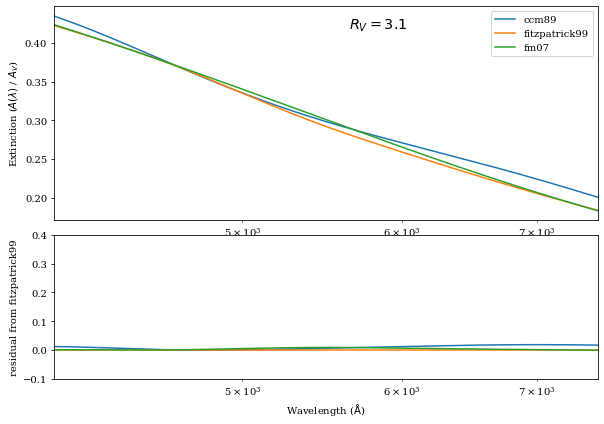

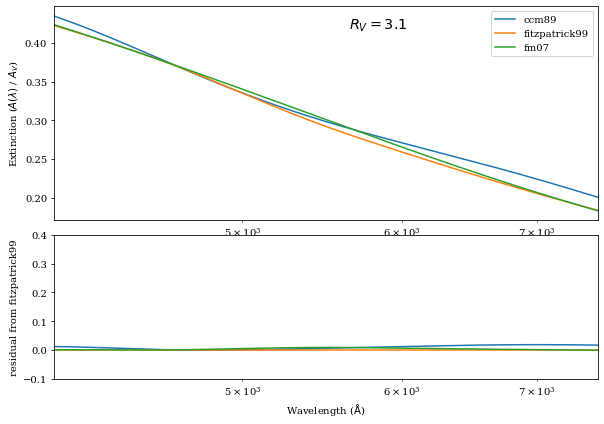

In [80]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda17 = {'ccm89': extinction.ccm89(wave17, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave17, 0.299, 3.1),
            'fm07': extinction.fm07(wave17, 0.299)}
extinction_figure(wave17, a_lambda17, 'fitzpatrick99')

In [81]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data17 = np.column_stack((wave17, flux17_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file17 = '../../../reduccion/NGC1313/cal/slit13_corregidof99.txt'

np.savetxt(output_file17, data17, fmt=data_format)

print(f"Los datos han sido guardados en {output_file17} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit13_corregidof99.txt sin notación científica


SLIT 19

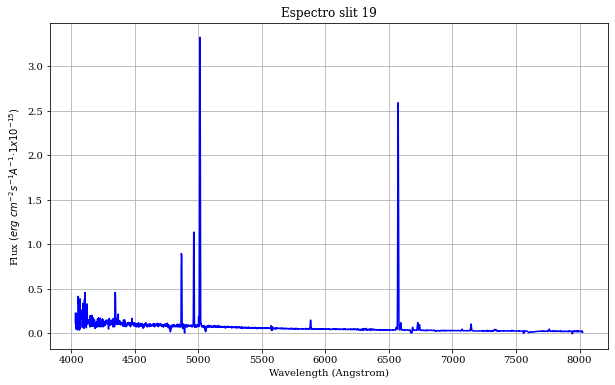

In [82]:
sp19 = ascii.read("../../../reduccion/NGC1313/cal/slit19_ascii.txt")
#print(sp1)

# renombrar las columnas
sp19['col1'].name = 'wavelength'
sp19['col2'].name = "flux"
#sp3

wave19 = sp19["wavelength"]
flux19 = sp19["flux"]
#wave3.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19, flux19, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19')
plt.grid(True)
plt.show()

In [83]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave3
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave19_ccm89 = extinction.ccm89(wave19, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave19_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave19_f99 = extinction.fitzpatrick99(wave19, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave19_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave19_fm07 = extinction.fm07(wave19, 0.299)
print(f' extinción en magnitudes con fm07: {wave19_fm07}')



 extinción en magnitudes con ccm89: [0.43467594 0.43453243 0.43438876 ... 0.17773389 0.17767029 0.17760671]
 extinción en magnitudes con f99: [0.42262998 0.42250223 0.42237451 ... 0.16470775 0.16465636 0.164605  ]
 extinción en magnitudes con fm07: [0.42352357 0.42339256 0.42326153 ... 0.16279262 0.16273788 0.16268317]


In [84]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux19}')

# "deredden" flux by A_V = 0.299 with CCM89
flux19_ccm89 = remove(ccm89(wave19, 0.299, 3.1), flux19)
print(f'valor de flujo deredden para slit 19 con ccm89: {flux19_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux19_f99 = remove(fitzpatrick99(wave19, 0.299, 3.1), flux19)
print(f'valor de flujo deredden para slit 19 con f99: {flux19_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux19_fm07 = remove(fm07(wave19, 0.299), flux19)
print(f'valor de flujo deredden para slit 19 con fm07: {flux19_fm07}')





valor de flujo original:     flux   
-----------
   0.220608
    0.10943
  0.1927925
 0.04689013
  0.2258886
  0.2035939
   0.167416
  0.1719418
 0.07836616
  0.1312189
        ...
 0.01911315
 0.01929556
 0.02200661
 0.01907888
 0.01978878
 0.01563204
 0.02169097
 0.02193128
 0.02183094
 0.01114585
0.009702983
Length = 2680 rows
valor de flujo deredden para slit 19 con ccm89:         flux        
--------------------
  0.3292241113993403
 0.16328615896453924
  0.2876375880141482
 0.06994866047152193
   0.336926114674996
 0.30363193659014936
 0.24964444699280286
 0.25635902568593083
 0.11682555106101802
 0.19559048641473442
                 ...
 0.02252317824123186
0.022736796757987808
0.025929821987916372
0.022478833458555475
0.023313873068607164
 0.01841558791423954
 0.02555191396555345
0.025833484190427927
0.025713783968749116
 0.01312747829034357
0.011427413805325713
Length = 2680 rows
valor de flujo deredden para slit 19 con f99:         flux        
--------------------
  0.32559

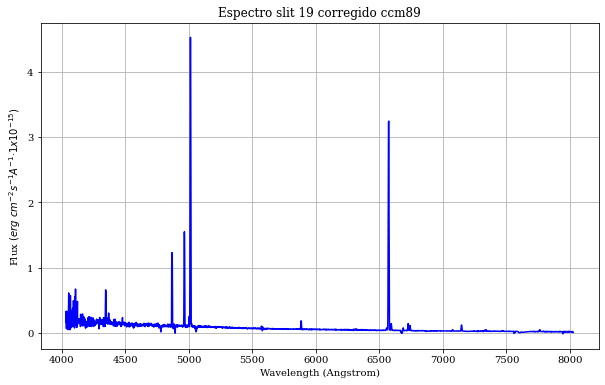

In [85]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19, flux19_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19 corregido ccm89')
plt.grid(True)
plt.show()

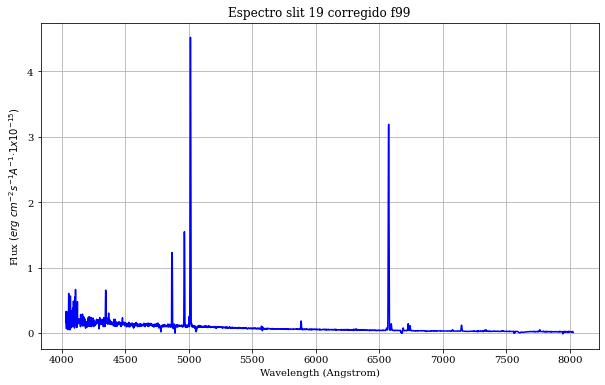

In [86]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19, flux19_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19 corregido f99')
plt.grid(True)
plt.show()

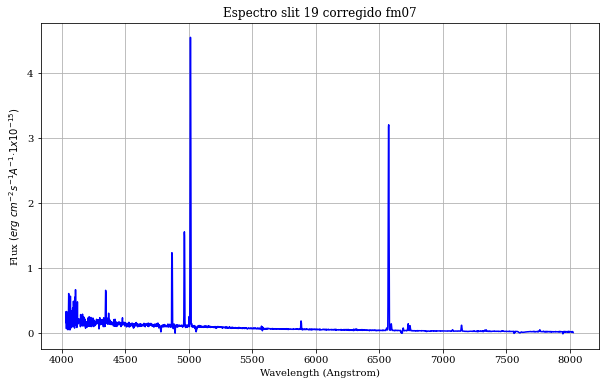

In [87]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave19, flux19_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 19 corregido fm07')
plt.grid(True)
plt.show()

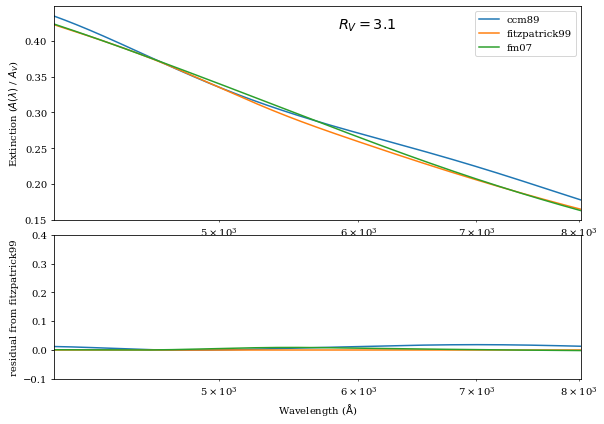

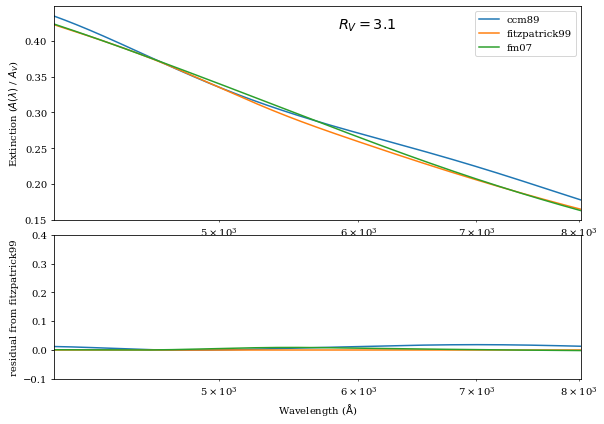

In [88]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda19 = {'ccm89': extinction.ccm89(wave19, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave19, 0.299, 3.1),
            'fm07': extinction.fm07(wave19, 0.299)}
extinction_figure(wave19, a_lambda19, 'fitzpatrick99')

In [89]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data19 = np.column_stack((wave19, flux19_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file19 = '../../../reduccion/NGC1313/cal/slit19_corregidof99.txt'

np.savetxt(output_file19, data19, fmt=data_format)

print(f"Los datos han sido guardados en {output_file19} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit19_corregidof99.txt sin notación científica


SLIT 21

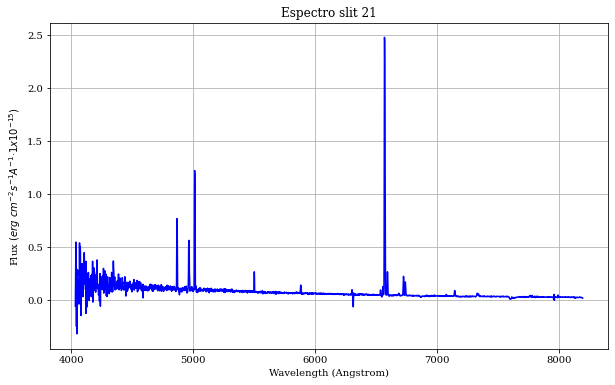

In [90]:
sp21 = ascii.read("../../../reduccion/NGC1313/cal/slit21_ascii.txt")
#print(sp21)

# renombrar las columnas
sp21['col1'].name = 'wavelength'
sp21['col2'].name = "flux"
#sp21

wave21 = sp21["wavelength"]
flux21 = sp21["flux"]
#wave21.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21')
plt.grid(True)
plt.show()

In [91]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave7
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave21_ccm89 = extinction.ccm89(wave21, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave21_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave21_f99 = extinction.fitzpatrick99(wave21, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave21_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave21_fm07 = extinction.fm07(wave21, 0.299)
print(f' extinción en magnitudes con fm07: {wave21_fm07}')



 extinción en magnitudes con ccm89: [0.43452561 0.43438218 0.43423859 ... 0.17058206 0.17052154 0.17046104]
 extinción en magnitudes con f99: [0.42249616 0.42236867 0.42224121 ... 0.15894253 0.15889374 0.15884498]
 extinción en magnitudes con fm07: [0.42338633 0.42325554 0.42312474 ... 0.15666072 0.15660892 0.15655714]


In [92]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux21}')

# "deredden" flux by A_V = 0.299 with CCM89
flux21_ccm89 = remove(ccm89(wave21, 0.299, 3.1), flux21)
print(f'valor de flujo deredden para slit 21 con ccm89: {flux21_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux21_f99 = remove(fitzpatrick99(wave21, 0.299, 3.1), flux21)
print(f'valor de flujo deredden para slit 21 con f99: {flux21_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux21_fm07 = remove(fm07(wave21, 0.299), flux21)
print(f'valor de flujo deredden para slit 21 con fm07: {flux21_fm07}')





valor de flujo original:     flux   
-----------
-0.05697761
  0.1589301
  0.2841458
  0.5455793
  0.1862112
  0.1069081
 -0.2493032
  0.1034783
 -0.2849933
 -0.3186263
        ...
 0.02626238
 0.02551703
 0.02420971
 0.02240679
  0.0238073
 0.02393534
 0.02269048
 0.02067602
 0.02046324
  0.0176235
 0.01754855
Length = 2799 rows
valor de flujo deredden para slit 21 con ccm89:         flux        
--------------------
-0.08501870234492202
 0.23711500089533663
  0.4238739013402121
   0.813759020808699
 0.27770657314841807
 0.15941652355941052
 -0.3717002661519603
 0.15426113925064852
 -0.4247995652568775
-0.47486824925483495
                 ...
 0.03074404313620758
0.029869828210094207
0.028337915435922057
 0.02622609802171079
0.027863772496008757
0.028012064517769063
0.026553694691444328
0.024194908650567285
0.023944579859721593
 0.02062057530568626
0.020531735240810742
Length = 2799 rows
valor de flujo deredden para slit 21 con f99:         flux        
--------------------
-0.084081

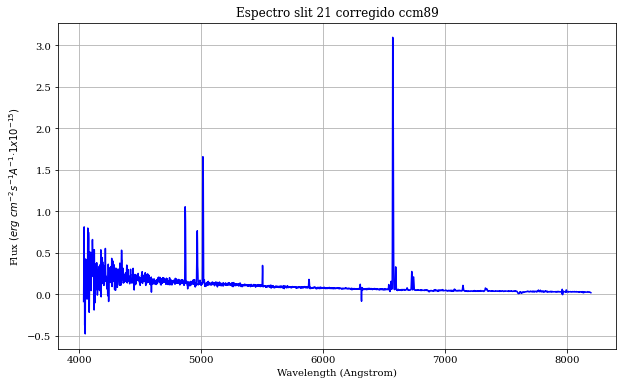

In [93]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido ccm89')
plt.grid(True)
plt.show()

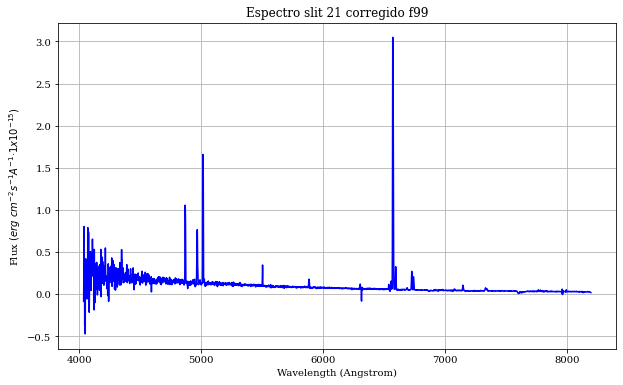

In [94]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido f99')
plt.grid(True)
plt.show()

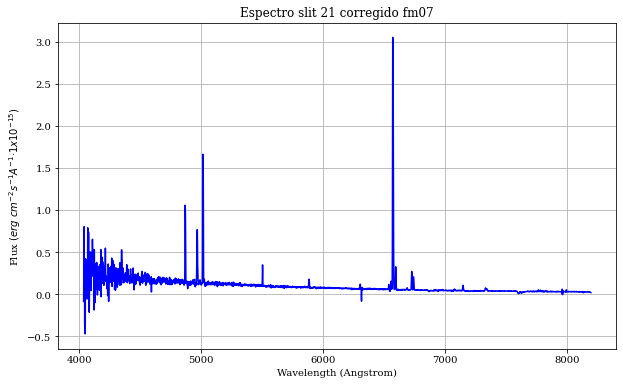

In [95]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave21, flux21_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 21 corregido fm07')
plt.grid(True)
plt.show()

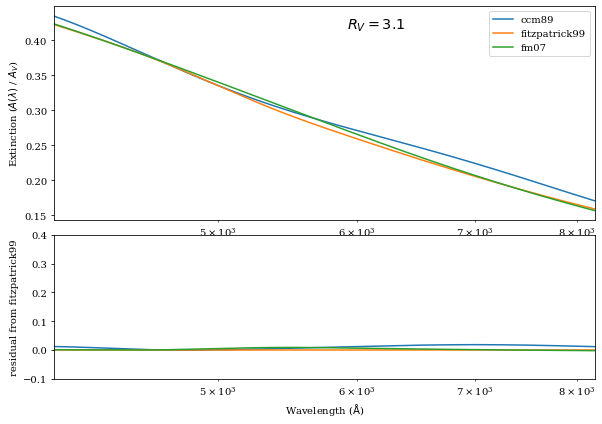

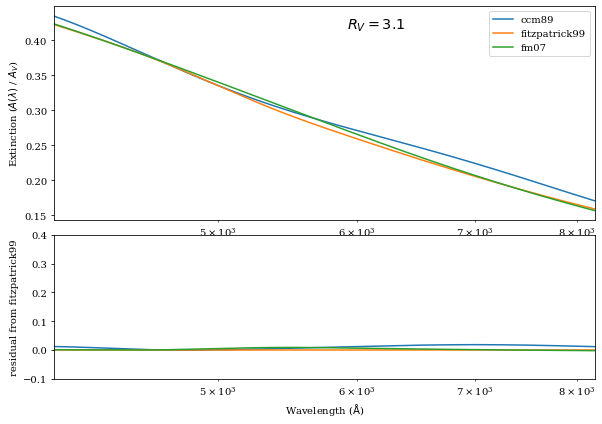

In [96]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda21 = {'ccm89': extinction.ccm89(wave21, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave21, 0.299, 3.1),
            'fm07': extinction.fm07(wave21, 0.299)}
extinction_figure(wave21, a_lambda21, 'fitzpatrick99')

In [97]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data21 = np.column_stack((wave21, flux21_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file21 = '../../../reduccion/NGC1313/cal/slit21_corregidof99.txt'

np.savetxt(output_file21, data21, fmt=data_format)

print(f"Los datos han sido guardados en {output_file21} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit21_corregidof99.txt sin notación científica


SLIT 23

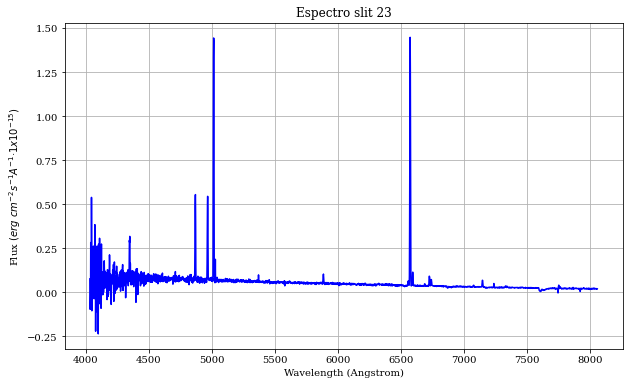

In [98]:
sp23 = ascii.read("../../../reduccion/NGC1313/cal/slit23_ascii.txt")
#print(sp23)

# renombrar las columnas
sp23['col1'].name = 'wavelength'
sp23['col2'].name = "flux"
#sp23

wave23 = sp23["wavelength"]
flux23 = sp23["flux"]
#wave23.data

%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23')
plt.grid(True)
plt.show()

In [99]:
import extinction 

#tengo mi array de longitudes de onda de todo el espectro: wave9
# Cardelli, Clayton & Mathis (1989) with A_V = 1 and R_V = 3.1
# mi A_v (de NED) es 0.299 (Landolt+2011)
wave23_ccm89 = extinction.ccm89(wave23, 0.299, 3.1)
print(f' extinción en magnitudes con ccm89: {wave23_ccm89}') #array of extinction in magnitudes at each input wavelength

# Fitzpatrick (1999)
wave23_f99 = extinction.fitzpatrick99(wave23, 0.299, 3.1)
print(f' extinción en magnitudes con f99: {wave23_f99}')

# The Fitzpatrick & Massa (2007) function has a fixed 𝑅𝑉 of 3.1:
wave23_fm07 = extinction.fm07(wave23, 0.299)
print(f' extinción en magnitudes con fm07: {wave23_fm07}')



 extinción en magnitudes con ccm89: [0.43471764 0.43457427 0.43443073 ... 0.17633475 0.17627171 0.17620869]
 extinción en magnitudes con f99: [0.42266713 0.42253945 0.4224118  ... 0.16357821 0.16352735 0.16347652]
 extinción en magnitudes con fm07: [0.42356167 0.42343073 0.42329979 ... 0.1615897  0.16153555 0.16148143]


In [100]:
from extinction import ccm89, fm07, fitzpatrick99, remove

print(f'valor de flujo original: {flux23}')

# "deredden" flux by A_V = 0.299 with CCM89
flux23_ccm89 = remove(ccm89(wave23, 0.299, 3.1), flux23)
print(f'valor de flujo deredden para slit 23 con ccm89: {flux23_ccm89}')

# "deredden" flux by A_V = 0.299 with fitzpatrick99
flux23_f99 = remove(fitzpatrick99(wave23, 0.299, 3.1), flux23)
print(f'valor de flujo deredden para slit 23 con f99: {flux23_f99}')

# "deredden" flux by A_V = 0.299 with fm07
flux23_fm07 = remove(fm07(wave23, 0.299), flux23)
print(f'valor de flujo deredden para slit 23 con fm07: {flux23_fm07}')





valor de flujo original:     flux    
------------
  0.07697215
 -0.09624738
 -0.06405802
-0.004206579
   0.2831761
   0.1935119
 -0.05562863
 -0.05038243
   0.5395591
   0.1876162
         ...
  0.02127904
  0.02165464
  0.02073235
  0.02048996
  0.02177049
  0.02084377
  0.01979746
  0.02115759
  0.02005473
   0.0208165
  0.02014694
Length = 2704 rows
valor de flujo deredden para slit 23 con ccm89:          flux        
---------------------
  0.11487371667958256
 -0.14362122369495292
 -0.09557532884708236
-0.006275435294479789
   0.4223902178627134
   0.2886073019287843
 -0.08295457019979313
 -0.07512133756731908
   0.8043876722932041
  0.27966546282106863
                  ...
  0.02504309567495499
 0.025483651451987582
  0.02439686012653784
   0.0241102237338173
  0.02561551365586197
 0.024523693625625752
 0.023291305821846017
 0.024890024513632588
 0.023591237351730226
 0.024485918207049946
 0.023696956384242206
Length = 2704 rows
valor de flujo deredden para slit 23 con f99:    

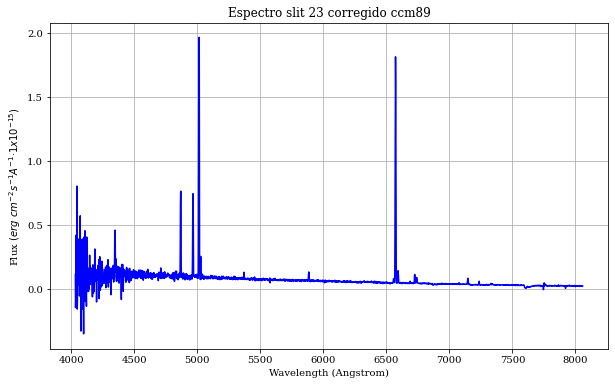

In [101]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23_ccm89, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23 corregido ccm89')
plt.grid(True)
plt.show()

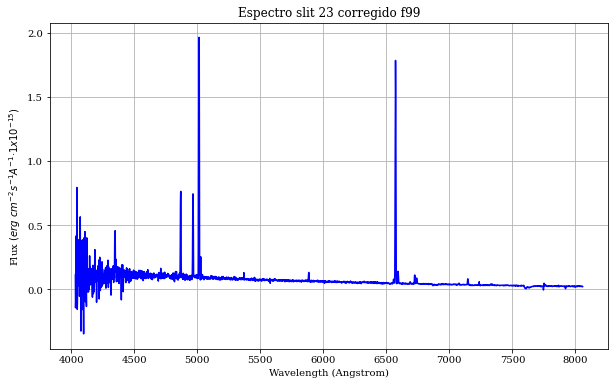

In [102]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23_f99, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23 corregido f99')
plt.grid(True)
plt.show()

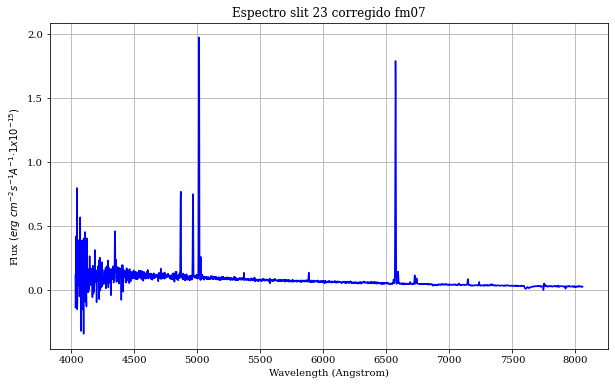

In [103]:
%matplotlib inline
plt.figure(figsize=(10, 6))
plt.plot(wave23, flux23_fm07, linestyle='-', color='b')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux $(erg\ cm^{-2} s^{-1} A^{-1} · 1x 10^{-15})$')
plt.title('Espectro slit 23 corregido fm07')
plt.grid(True)
plt.show()

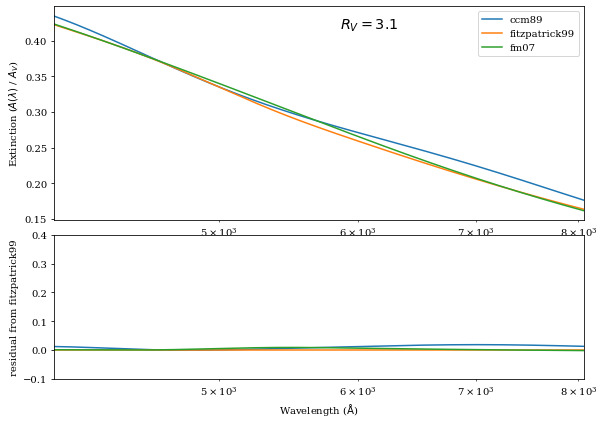

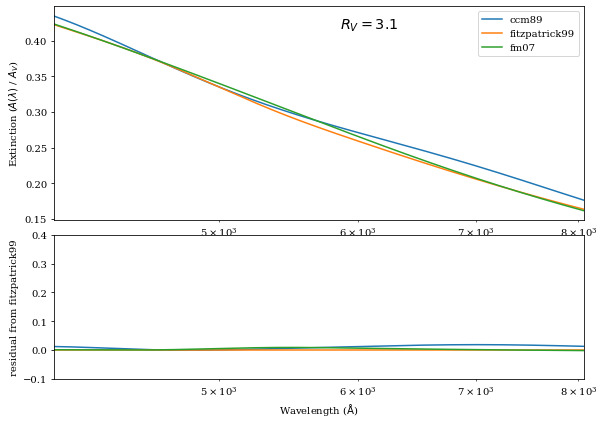

In [104]:
from extinction_plot import extinction_figure

%matplotlib inline
a_lambda23 = {'ccm89': extinction.ccm89(wave23, 0.299, 3.1),
            #'odonnell94': extinction.odonnell94(wave, 0.299, 3.1),
            'fitzpatrick99': extinction.fitzpatrick99(wave23, 0.299, 3.1),
            'fm07': extinction.fm07(wave23, 0.299)}
extinction_figure(wave23, a_lambda23, 'fitzpatrick99')

In [105]:
import numpy as np

# Supongamos que 'wave' y 'flux_f99' ya están definidos
# Por ejemplo:
# wave = np.array([4000.123456, 4030.654321, 4060.789012])
# flux_f99 = np.array([81.56789, 65.12345, 90.98765])

# Combina 'wave' y 'flux_f99' en un solo array NumPy
data23 = np.column_stack((wave23, flux23_f99))

# Especifica el formato de los datos (punto flotante con 11 decimales)
data_format = '%.11f'

# Escribir el array en un archivo ASCII sin notación científica
output_file23 = '../../../reduccion/NGC1313/cal/slit23_corregidof99.txt'

np.savetxt(output_file23, data23, fmt=data_format)

print(f"Los datos han sido guardados en {output_file23} sin notación científica")


Los datos han sido guardados en ../../../reduccion/NGC1313/cal/slit23_corregidof99.txt sin notación científica
